# Problem Set 1

### Anbar Aizenman, Ilya Lukibanov, Irina Osipova, Isamar Troncoso

## Computational Complexity

#### Import libraries

In [1]:
import numpy as np
import time
np.random.seed(0)

##### A

Inner product function

In [2]:
def inner_product(A,B):
    #:param A: vector numpy.array
    #:param B: object of type numpy.array
    #:return: object of type numpy.int, inner product result
   
    # error handling:
    if len(A) != len(B):
        raise ValueError('vectors have different length')

    C = 0
    for i in range(len(B)):
        C += A[i] * B[i]
    
    return C

Matrix product function

In [3]:
def matrix_product(A,B):
    #:param A: object of type numpy.matrix
    #:param B: object of type numpy.matrix
    #:return: object of type numpy.matrix, multiplication result
    
    r1 = A.shape[0] #number of rows of A
    c1 = A.shape[1] #number of columns of A
    r2 = B.shape[0] #number of rows of B
    c2 = B.shape[1] #number of columns of B

    # error handling:
    if c1 != r2:
        raise ValueError('internal dimensions do not match')

    C = np.zeros([r1,c2])
    for i in range(r1):
        for j in range(c2):
            for k in range(r2):
                C[i,j] += A[i,k] * B[k,j]
    return C

Examples: application of both functions

In [4]:
a1 = np.array([1,2,3])
print('The inner product of ' + str(a1) + ' with itself it is equal to '+ str(inner_product(a1, a1)))

The inner product of [1 2 3] with itself it is equal to 14


In [5]:
a2 = np.identity(3)
print('The square of the matrix ' + '\n' + str(a2) + '\n' + ' is equal to '+ '\n' + str(matrix_product(a2, a2)))

The square of the matrix 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
 is equal to 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


##### B 

Set matrix dimensions

In [6]:
m = 50
n = 100
p = 200

Random matrices

In [7]:
x = np.matrix(np.random.rand(m, n))
y = np.matrix(np.random.rand(n, p))

The amount of time it takes to multiply X and Y using the custom code

In [8]:
%timeit -n 1 -r 1 matrix_product(x, y)

1.86 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


The amount of time it takes to multiply X and Y using built-in NumPy methods

In [9]:
%timeit -n 1000 -r 100 np.dot(x, y)

39.4 µs ± 11.1 µs per loop (mean ± std. dev. of 100 runs, 1000 loops each)


#### C

Set matrix dimensions

In [10]:
m = 500
n = 1000
p = 2000

Random matrices

In [11]:
x = np.matrix(np.random.rand(m, n))
y = np.matrix(np.random.rand(n, p))

In class, we showed that matrix multiplication takes $O(mnp)$. We increased each dimension ten times; therefore, running time should increase by 1000 times. However, built-in method is optimized; thus, it might work faster.

The amount of time it takes to multiply X and Y using the custom code

In [12]:
%timeit -n 1 -r 1 matrix_product(x, y)

34min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


The amount of time it takes to multiply X and Y using built-in NumPy methods

In [13]:
%timeit np.dot(x, y)

24.6 ms ± 3.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


We get that time increases by 1,000 times in built-in function, and it increases by more than 1,000 times in hand-written function.

#### D

Set matrix dimensions

In [14]:
m = 5000
n = 10000
p = 20000

Random matrices

In [15]:
x = np.random.rand(m, n)
y = np.matrix(np.random.rand(n, p))

In class, we showed that matrix multiplication takes $O(mnp)$. We increased each dimension ten times; therefore, running time should increase by 1000 times. However, built-in method is optimized; thus, it might work faster.

The amount of time it takes to multiply X and Y using built-in NumPy methods

In [16]:
%timeit np.dot(x, y)

21 s ± 810 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We get that time increases only by 650 times. It runs faster because built-in algorithms are optimized to decrease running time.

#### E

Define some functions which would simplify life

Regress function

In [17]:
def reg(y,x):
    np.linalg.lstsq(x,y)

Data generation function

In [18]:
def random_matrices(n,p):
    x = np.random.rand(n,p)
    y = np.random.rand(n,1)
    return y.reshape(n,1), x

Data generation for the next items

In [19]:
y5000, x5000 = random_matrices(5000,200)
y50000, x50000 = random_matrices(50000,200)
y_2000, x_2000 = random_matrices(5000,2000)

We showed in class that a linear regression takes $O(np^2+p^3)$.

1) Regression time for 5,000 observations

In [20]:
%timeit -r 100 reg(x5000,y5000)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


7.45 ms ± 730 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


2) By the above formula, if we increase number of observations by a factor of ten, the running time would increase less than by ten times because of second term. It it is relatively high compare to the first term, than growth in n would lead to a smaller growth in running time. However, the second term is quite small in our case.

Regression time for 50,000 observations

In [21]:
%timeit -n 10 -r 10 reg(x50000,y50000)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


76.2 ms ± 1.31 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


We get that time increases by more than 10 times. 

3) By $O(p^2(n+p))$, if we increase p by a factor of ten, the running time should increase by a factor between 100 and 1,000 depending on the ratio between n and p. However, n and p are quite small, and this is kind of an assymptotic estimation; therefore, optimized algorithms could do it faster.

Regression time for 2,000 features and 5,000 observations

In [22]:
%timeit -n 10 -r 10 reg(x_2000,y_2000)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


82.7 ms ± 1.54 ms per loop (mean ± std. dev. of 10 runs, 10 loops each)


We get than time increases only by a factor ten. Build-in algorithms quite efficient in this case.

## Breast Cancer Data

#### Import Libraries and Dataset

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

Suppressing exponential formatting (makes it easier to read)

In [24]:
np.set_printoptions(suppress=True)

#### 1

Load dataset and list target and feature names (to understand the format of data)

In [25]:
cancer = load_breast_cancer()
#print(cancer)

In [26]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [27]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Use usual notation

In [28]:
y = cancer.target
X = cancer.data

#### 2

Standardize X for analysis

In [29]:
standardized_X = preprocessing.scale(X)

#### 3

Conduct PCA with all components

In [30]:
pca = PCA(n_components = 30)
pca.fit(standardized_X)
pca_vectors = pca.components_

Print the explained variance sorted by principal component

In [31]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087,
        0.29443315,  0.26162116,  0.24178242,  0.15728615,  0.0943007 ,
        0.0800034 ,  0.05950361,  0.05271142,  0.0495647 ,  0.03121426,
        0.03002566,  0.02748771,  0.02438369,  0.01808679,  0.01550853,
        0.00819204,  0.00691261,  0.00159214,  0.00075012,  0.00013328])

Print ratio of variance explained by each component

In [32]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978,
       0.00979719, 0.00870538, 0.00804525, 0.00523366, 0.00313783,
       0.00266209, 0.00197997, 0.00175396, 0.00164925, 0.00103865,
       0.0009991 , 0.00091465, 0.00081136, 0.00060183, 0.00051604,
       0.00027259, 0.00023002, 0.00005298, 0.00002496, 0.00000443])

To explain 90% variance we need 7 components

Print cumulative sum of variance explained by components (easier way to find above)

In [33]:
pcac = pca.explained_variance_ratio_.cumsum()
print("%s of the variance explained by the first two principal components" %pcac[1] )

0.6324320765155941 of the variance explained by the first two principal components


From the above, we see that if we keep only two components, 63% of variance is explained.

#### 4

#### Import Libraries and Datasets

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import zero_one_loss

Predict Cluster Labels

We use the standardized data with the full features as it produces different results for K-means, and we wanted to be consistent with the case with only two principal components

In [35]:
km = KMeans(n_clusters = 2)
km.fit(standardized_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Finding correctly predicted rate

In [36]:
predict = zero_one_loss(y, km.labels_) 
print("K-Means accurate classification rate with full features is %s" %predict )

K-Means accurate classification rate with full features is 0.9103690685413005


Conduct same analysis but using the case where only 2 principal components were kept

In [37]:
km1 = KMeans(n_clusters = 2)
km1.fit(standardized_X[:,0:2])
predictpca = zero_one_loss(y, km1.labels_) 
print("K-Means accurate classification rate with two principal components is %s" %predictpca )

K-Means accurate classification rate with two principal components is 0.13708260105448156


Using all components we can correctly predict 90.5% cases of cancer. If use only only two components, we can correctly predict 86% cases of cancer. Therefore, these two components are good predictors, even though they explain only 63% of variation.

## Olivetti Faces

#### Libraries

In [38]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

Allow graphs

In [39]:
%matplotlib inline

#### Functions

In [40]:
def Plot_the_picture3by3(x):
    fig = plt.figure()
    for i in range(9):
        a = fig.add_subplot(3,3,i+1, xticks=[], yticks=[])
        b = plt.imshow(x[i], 'gray')
    plt.show()

In [41]:
def Compress_Image(X, c, k, l):
    pca = PCA(c)
    pca_fit = pca.fit(X)
    P_t = pca_fit.components_ #we use notations from the slides
    P = P_t.transpose()
    Z_c= X.dot(P)
    X_c= Z_c.dot(P_t)
    image = X_c[0].reshape(k,l)
    return image

#### 1

Loading data

In [42]:
raw_data = fetch_olivetti_faces(shuffle = True,  random_state = 123)
data_faces = raw_data.data

Getting dimensions for further use: n - number of components, p - number of features, k x l - dimensions of faces

In [43]:
n, p = data_faces.shape
k, l = raw_data.images.shape[1], raw_data.images.shape[2]

#### 2 

Demean faces

In [44]:
demeaned_data = data_faces-data_faces.mean(1).reshape(n, 1)

#### 3

Create a PCA object for nine eigenfaces and perform PCA on the demeaned data

In [45]:
pca = PCA(n_components = 9)
pca.fit(demeaned_data)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Extract first nine eigenfaces

In [46]:
nine_eigenfaces = pca.components_.reshape((9, k, l))

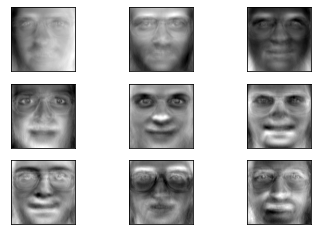

In [47]:
Plot_the_picture3by3(nine_eigenfaces)

#### 4

Since our data is small, PCA performes fast. For ease of realization we do PCA for each number of combined eigenfaces: 1, 51, ... It can be optimized, but we are not asked to do so.

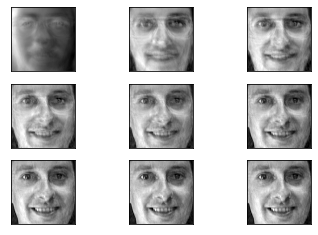

In [48]:
face = np.zeros((9,k,l))
j = 0
for i in (1, 51, 101, 151, 201, 251, 301, 351, 400):
    face[j] = Compress_Image(demeaned_data, i, k, l)
    j += 1
Plot_the_picture3by3(face) 